In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Data_train_reduced.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

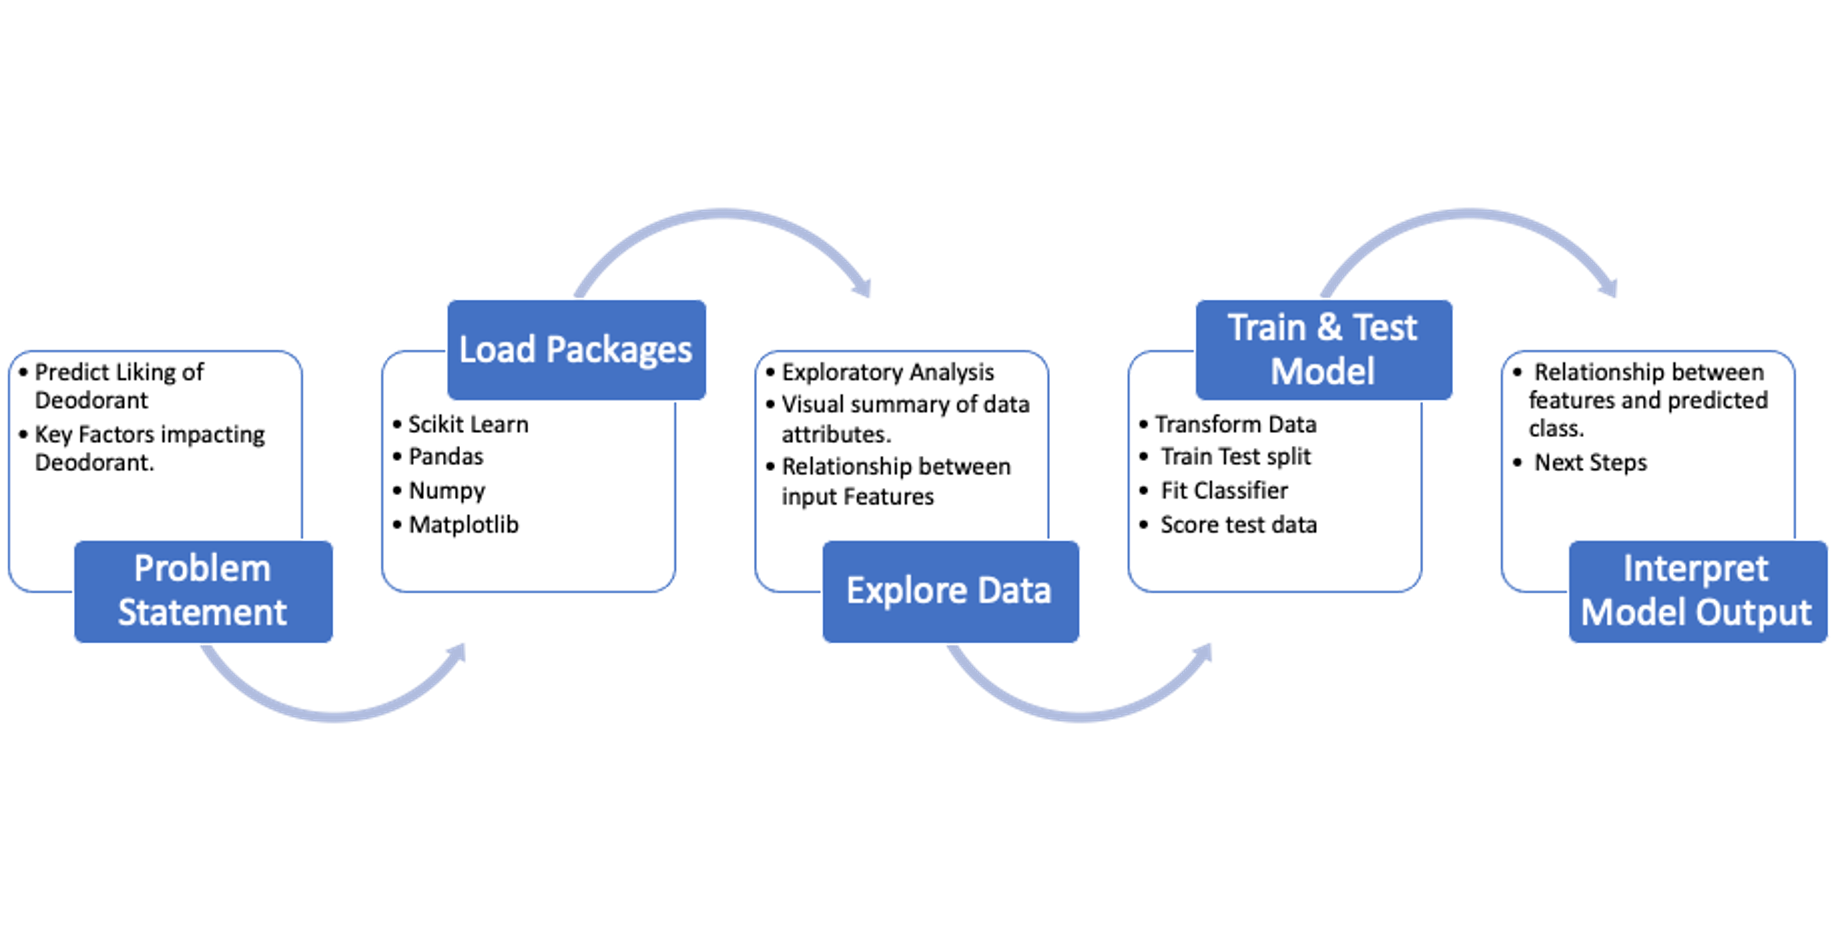

In [7]:
import os
from IPython.display import Image
Image(filename="Process_flow.png", width= 900,height=900)

In [ ]:
# 1. Load Libraries
# 

In [3]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [4]:
# 2. Load Data


In [8]:
# Load data
df = pd.read_csv('Data_train_reduced.csv')
print(f"Shape of data: {df.shape}")
df.head()

Shape of data: (2500, 64)


,Respondent.ID,Product.ID,Product,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,...,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
0,3800,121,Deodorant B,1,4,1,4,2,5,4,...,7,4,1,4,3,1,1,0.0,0,3
1,3801,121,Deodorant B,0,5,1,4,4,2,2,...,6,4,1,4,3,1,1,0.0,0,4
2,3802,121,Deodorant B,0,6,1,3,2,5,2,...,7,4,1,3,5,1,1,0.0,0,2
3,3803,121,Deodorant B,1,4,0,4,5,5,4,...,1,4,1,4,9,1,3,0.0,0,3
4,3804,121,Deodorant B,1,4,1,2,1,3,1,...,4,4,1,3,5,1,2,0.0,0,3


In [9]:
# 3. Explore Data


In [10]:
print("Column names:-")
df.columns

Column names:-


Index(['Respondent.ID', 'Product.ID', 'Product', 'Instant.Liking',
       'q1_1.personal.opinion.of.this.Deodorant', 'q2_all.words',
       'q3_1.strength.of.the.Deodorant', 'q4_1.artificial.chemical',
       'q4_2.attractive', 'q4_3.bold', 'q4_4.boring', 'q4_5.casual',
       'q4_6.cheap', 'q4_7.clean', 'q4_8.easy.to.wear', 'q4_9.elegant',
       'q4_10.feminine', 'q4_11.for.someone.like.me', 'q4_12.heavy',
       'q4_13.high.quality', 'q4_14.long.lasting', 'q4_15.masculine',
       'q4_16.memorable', 'q4_17.natural', 'q4_18.old.fashioned',
       'q4_19.ordinary', 'q4_20.overpowering', 'q4_21.sharp',
       'q4_22.sophisticated', 'q4_23.upscale', 'q4_24.well.rounded',
       'q5_1.Deodorant.is.addictive', 'q7', 'q8.1', 'q8.2', 'q8.5', 'q8.6',
       'q8.7', 'q8.8', 'q8.9', 'q8.10', 'q8.11', 'q8.12', 'q8.13', 'q8.17',
       'q8.18', 'q8.19', 'q8.20',
       'q9.how.likely.would.you.be.to.purchase.this.Deodorant',
       'q10.prefer.this.Deodorant.or.your.usual.Deodorant',
       'q11

In [11]:
print("Summary Stats of numberical columns:-")
df.describe(include=[np.number])

Summary Stats of numberical columns:-


,Respondent.ID,Product.ID,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,...,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
count,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,...,2500.000000,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8249.500000,460.400000,0.24720,5.129600,1.121200,3.344400,2.500000,3.71680,3.546000,2.241600,...,3.522400,4.0,1.665200,3.199200,4.996000,1.742000,1.898000,0.025296,0.038400,3.072000
std,3433.008516,308.412528,0.43147,1.481918,0.934055,0.743243,1.384618,1.27548,1.261951,1.242838,...,1.964241,0.0,1.036889,0.970307,2.371125,0.726944,1.440426,0.104856,0.192198,1.620082
min,3800.000000,121.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,4.0,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,5324.750000,230.000000,0.00000,5.000000,0.000000,3.000000,1.000000,3.00000,3.000000,1.000000,...,2.000000,4.0,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,8249.500000,344.000000,0.00000,5.000000,1.000000,3.000000,2.000000,4.00000,4.000000,2.000000,...,3.000000,4.0,1.000000,3.000000,4.000000,2.000000,1.000000,0.000000,0.000000,3.000000
75%,9774.250000,633.000000,0.00000,6.000000,2.000000,4.000000,4.000000,5.00000,5.000000,3.000000,...,5.000000,4.0,2.000000,4.000000,7.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,14099.000000,974.000000,1.00000,7.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,7.000000,4.0,5.000000,7.000000,10.000000,5.000000,7.000000,1.000000,1.000000,6.000000


In [12]:
# Find columns with blank or nan values
def columns_with_na(dframe):
    temp = dframe.isna().sum()
    temp = temp[temp >0]
    print(f"Columns containing nan values:{temp.index}")
    return temp.index

columns_to_drop = list(columns_with_na(df))
# print(columns_to_drop)
# Drop rows with nan values
df.drop(columns_to_drop, axis='columns',inplace = True)
df.shape

Columns containing nan values:Index(['q8.2', 'q8.7', 'q8.8', 'q8.9', 'q8.10', 'q8.12', 'q8.17', 'q8.18',
       'q8.20'],
      dtype='object')


(2500, 55)

<AxesSubplot:>

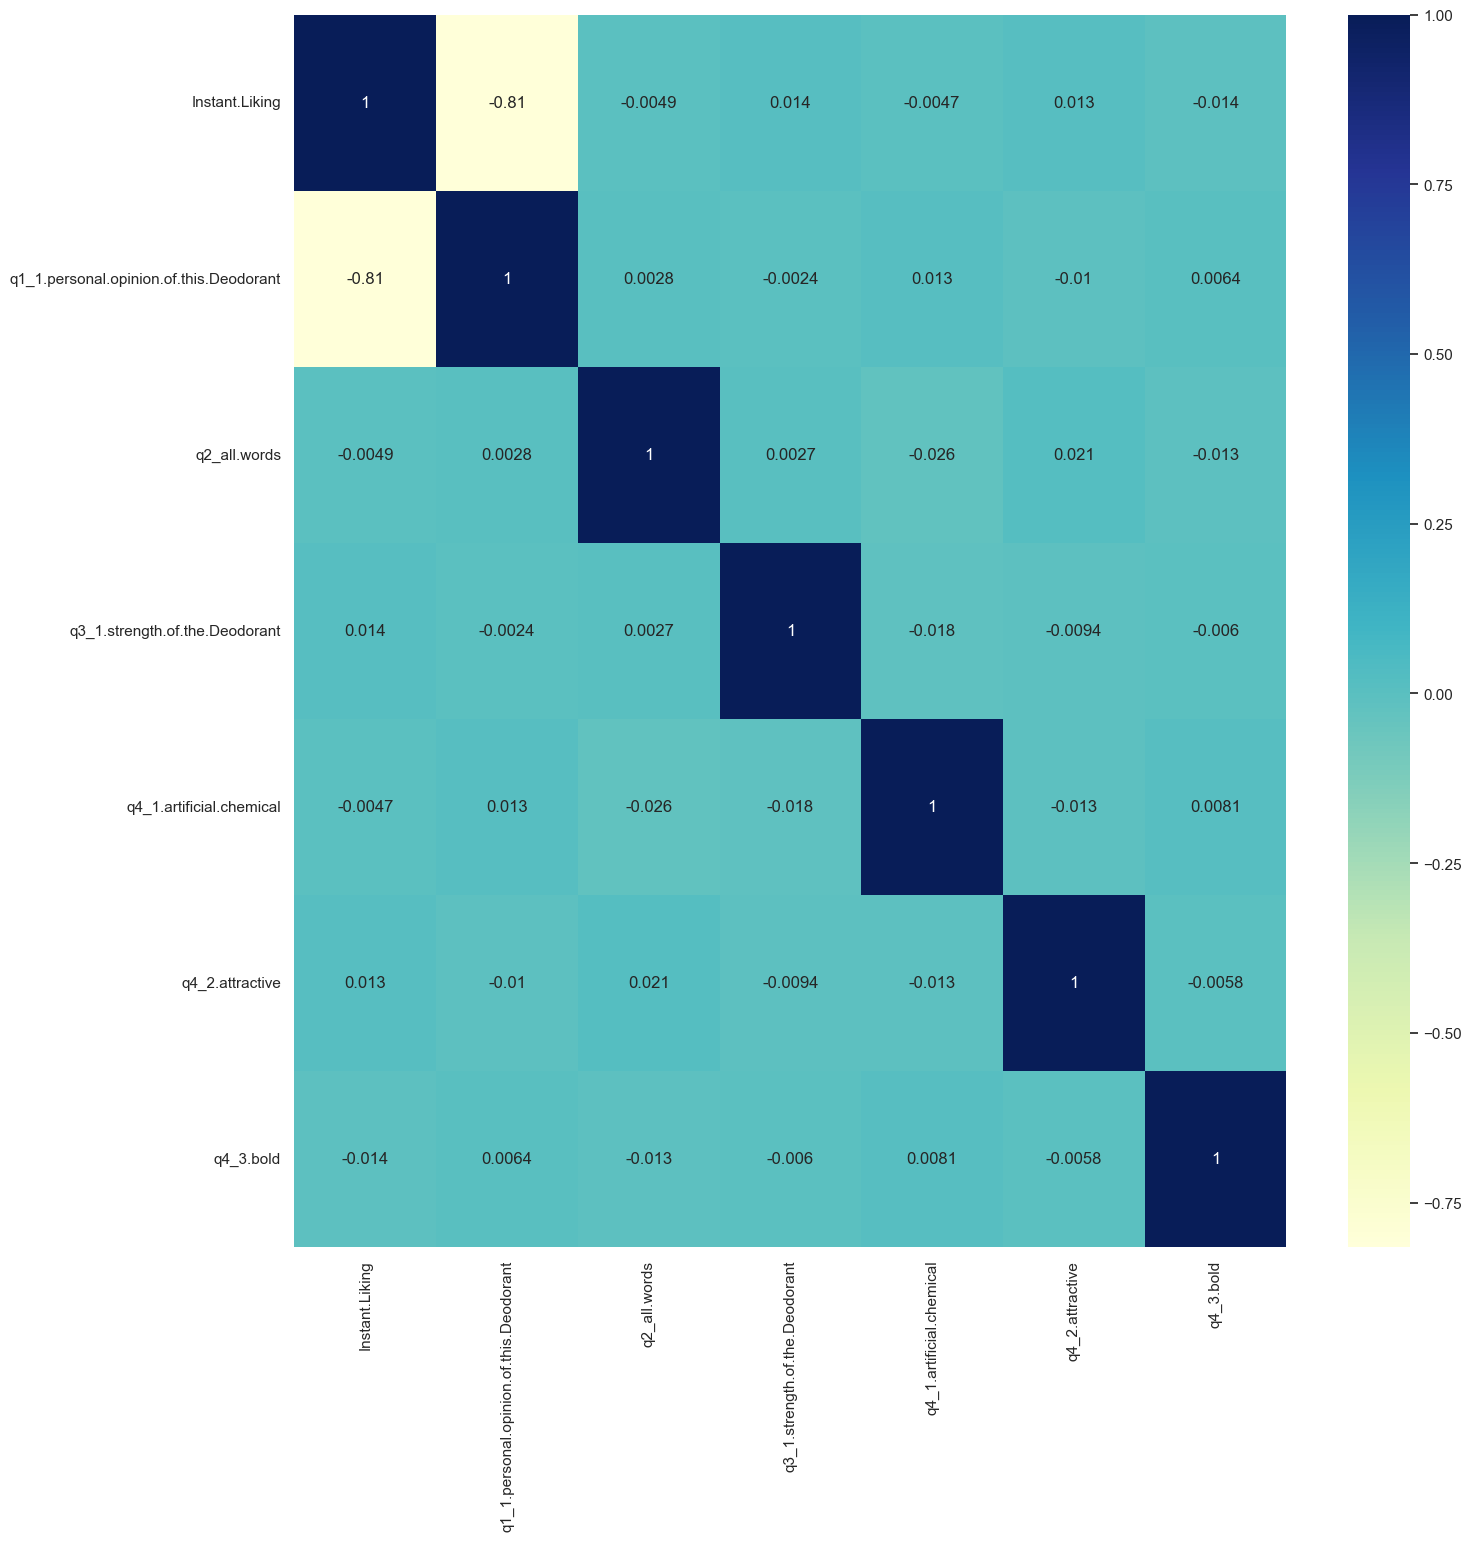

In [13]:
# Explore data visually
# Build Correlation Matrix to study multi collinearity
correlation = df.iloc[:,3:10].corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

In [14]:
classes = df["Instant.Liking"].value_counts()
classes.index = [str(x) for x in classes.index]

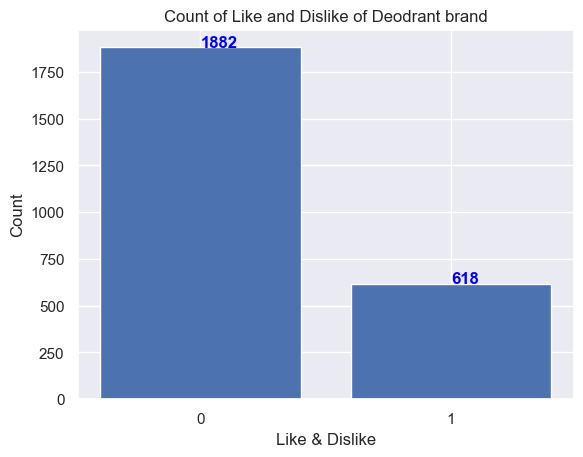

In [15]:
fig, ax = plt.subplots()

ax.bar(x = classes.index, height = classes)
#ax.barh(x = df['Gender'], height = np.mean(df.score))
ax.set_title('Count of Like and Dislike of Deodrant brand')
ax.set_xlabel('Like & Dislike')
ax.set_ylabel('Count')
for i, v in enumerate(classes):
    ax.text(i, v+2, s = int(v), color='blue', fontweight='bold')

In [16]:
# 4. Feauture Transformation
# Transform values to min max scaler
# As most of the data in columns is discrete we can get away with good results without scaling value as well

In [17]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(df.iloc[:,4:])
Y = df.iloc[:,3]

In [18]:
X_minmax, Y.head()

(array([[0.5       , 0.2       , 0.75      , ..., 0.        , 0.        ,
         0.4       ],
        [0.66666667, 0.2       , 0.75      , ..., 0.        , 0.        ,
         0.6       ],
        [0.83333333, 0.2       , 0.5       , ..., 0.        , 0.        ,
         0.2       ],
        ...,
        [0.5       , 0.4       , 0.5       , ..., 0.        , 0.        ,
         0.8       ],
        [0.66666667, 0.4       , 0.75      , ..., 0.        , 0.        ,
         0.6       ],
        [1.        , 0.6       , 0.5       , ..., 0.        , 0.        ,
         0.        ]]),
 0    1
 1    0
 2    0
 3    1
 4    1
 Name: Instant.Liking, dtype: int64)

In [19]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_minmax,Y,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(2000, 51)
Shape of Test Xs:(500, 51)
Shape of Training y:(2000,)
Shape of Test y:(500,)


In [20]:
# Build Model
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test)

In [21]:
# Model Score
print(score)
print(y_predicted)

1.0
[0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 1 0 0 1 1 1 

In [22]:
# Plot Confusion Matrix¶


In [23]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[379,   0],
       [  0, 121]], dtype=int64)

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[379   0]
 [  0 121]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


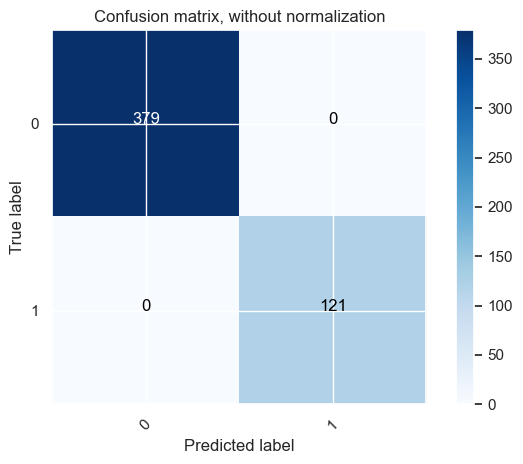

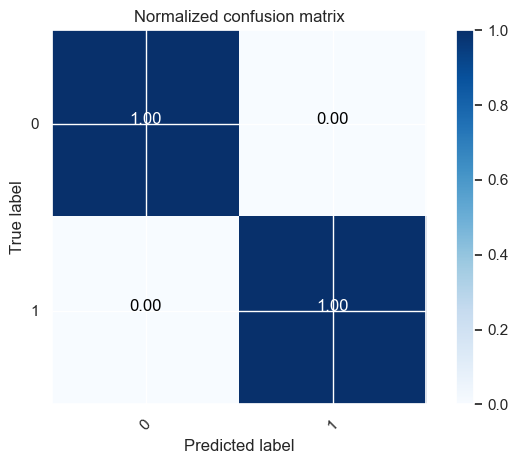

In [25]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.index,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= classes.index, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
# Log Loss
# To study the prediction by chance of the mdoel.
# Output normalized valuerange between 0 to 1
# Closer to 0 indicates that true prediction by model is less likely by chance

In [27]:
from sklearn.metrics import log_loss

norm_log_loss = log_loss(Y, clf.predict_proba(X_minmax), normalize=True)
print(f"Normalized Log loss of the model: {norm_log_loss} ")

Normalized Log loss of the model: 0.09432580523095734 


In [28]:
# Predict on separate Test data


In [30]:
validation_df = pd.read_csv("test_data.csv")
print(f"Size of data frame: {validation_df.shape}")
# validation_df.columns

Size of data frame: (5105, 58)


In [31]:
# Drop columns which were not part of the orignal training data to maintain same feature set
columns_to_drop_valid = [col for col in validation_df.columns if col in columns_to_drop]
columns_to_drop_valid


['q8.2', 'q8.8', 'q8.12', 'q8.20']

In [32]:
validation_df.drop(columns_to_drop_valid, axis= "columns",inplace= True)

In [33]:
X_valid = minmax.transform(validation_df.iloc[:,3:])
print(f"Shape of scaled feature set: {X_valid.shape}")

Shape of scaled feature set: (5105, 51)


In [34]:
y_predicted_valid = clf.predict(X_valid)

In [35]:
# Save Model to disk¶


In [36]:
import joblib
joblib.dump(clf,"model.joblib")

['model.joblib']

In [ ]:
# Comments
# The score of 1.0 on prediction of 20% of sample can be attrubuted to large input feature set( 55 features) adding to the noise in the data.
# One may also implement Principal Compnent Analysis (PCA) to reduce feature space or randomly droping few features at a time to verfiy impact on accuracy.